# Data Exploration (no text mining yet) 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/data job posts.csv')

In [3]:
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [4]:
df_small = df.loc[:, df.columns != "jobpost"]
df_small.to_csv('./data/data job posts mini.csv')

## See Jobs Count by Year

In [5]:
df_year = df.groupby(df["Year"]).count()

In [6]:
df_year['jobpost'].plot(style='.-')

In [7]:
df["JobDescription"].head(10)

0    AMERIA Investment Consulting Company is seekin...
1                                                  NaN
2    Public outreach and strengthening of a growing...
3    The LEAD (Local Enhancement and Development fo...
4                                                  NaN
5       Saleswoman will sell menswear and accessories.
6    The Armenian Branch Office of the Open Society...
7                                                  NaN
8                                                  NaN
9    The incumbent assists in coordinating INL-fund...
Name: JobDescription, dtype: object

In [20]:
df_company_count = df.groupby(['Company']).count()

df_company_count["jobpost"].head(50)

Company
""Aregak" Universal Credit Organization" CJSC     7
""Armenia" International Airport" CJSC            1
""Armenia" International Airports" CJCS           1
""Armenia" International Airports" CJSC           3
"4h" LLC                                          4
"A.B." LLC                                        1
"ABM Soft Prof" Ltd.                              2
"ACBA-Credit Agricole Bank" CJSC                  3
"ACRA Credit Reporting CJSC                       1
"ACRA Credit Reporting" CJSC                      6
"ADF Shops" CJSC                                  5
"ALGO" Educational Center                         3
"AMI Novosti-Armenia" Information Agency LLC      2
"ARGE Business" LLC                               1
"ATP" Charitable Foundation                       1
"AV TV" Limited Liability Company                 1
"AVC Balance" LTD                                 1
"Aalyst" Ltd                                      1
"Abser" LLC                                       1
"Acc

## IT Field Identifies Whether Job is IT

In [9]:
df_year = df.groupby([df["Year"], df["IT"]]).count()
df_year.head()

jobpost  date  Title  Company  AnnouncementCode  Term  \
Year IT                                                             
2004 False      730   730    729      730                64   140   
     True       145   145    145      145                24    36   
2005 False      930   930    930      930               101   285   
     True       208   208    208      208                37    95   
2006 False      891   891    886      886               106   344   

            Eligibility  Audience  StartDate  Duration  ...    JobRequirment  \
Year IT                                                 ...                    
2004 False          172        32        259       202  ...              466   
     True            10         8         60        48  ...              101   
2005 False          214        19        401       384  ...              708   
     True            27        21        129       120  ...              142   
2006 False          179        29        414       461  ...              683   

            RequiredQual  Salary  ApplicationP  OpeningDate  Deadline  Notes  \
Year IT                                                                        
2004 False           671     191           717          248       709     97   
     True            144      61           144           65       143     19   
2005 False           886     396           921          899       924    156   
     True            207     131           208          205       207     28   
2006 False           855     377           881          877       883    101   

            AboutC  Attach  Month  
Year IT                            
2004 False     305      26    730  
     True       85       1    145  
2005 False     534      60    930  
     True      148       2    208  
2006 False     593      43    891  

[5 rows x 22 columns]

## Group by month to see which months are most popular for postings

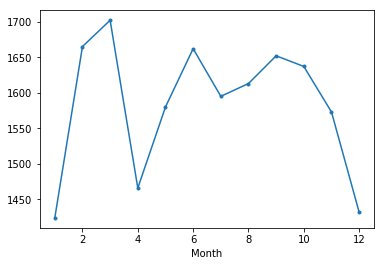

In [10]:
df_month = df.groupby(df["Month"]).count()
df_month['jobpost'].plot(style='.-')

January and December have low posts. Most job posts are in Feb/Mar and June. 

## Companies posting the most often

See which are the big companies which are either (1) hiring a lot (2) have super-high turnover rates 

In [11]:
df.groupby(df["Company"]).count().sort_values(by='jobpost', ascending=False)

,jobpost,date,Title,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
Company,,,,,,,,,,,,,,,,,,,,,
ArmenTel CJSC,353,353,353,109,12,160,39,54,13,353,...,270,353,353,353,4,239,1,353,353,353
World Vision Armenia,239,239,239,0,89,29,0,96,164,238,...,2,239,219,239,40,233,23,239,239,239
Mentor Graphics Development Services CJSC,236,236,236,1,234,13,0,236,232,236,...,236,236,236,236,0,236,0,236,236,236
Career Center NGO,229,229,229,0,107,213,13,110,4,229,...,3,216,142,214,224,127,110,229,229,229
Orange Armenia,203,203,203,0,153,161,1,159,165,203,...,166,203,203,203,132,150,0,203,203,203
Ameriabank CJSC,196,196,196,0,51,5,0,159,86,196,...,188,196,196,196,49,85,179,196,196,196
Converse Bank CJSC,161,161,161,0,5,2,0,38,8,161,...,19,161,161,161,2,45,160,161,161,161
SAS Group LLC,150,150,150,0,54,0,5,72,72,150,...,73,150,150,149,5,0,0,150,150,150
UNDP Armenia Office,132,132,132,31,0,1,0,53,68,132,...,4,132,132,132,42,10,27,132,132,132


## Do we need to text mine salary? 

In [12]:
df_salary = df[df['Salary'].notnull()]

In [13]:
df_salary.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
184,Boomerang Software LLC\nTITLE: Technical Writ...,"Apr 5, 2004",Technical Writer,Boomerang Software LLC,NaN,NaN,NaN,NaN,NaN,NaN,...,"Salary is dependent on education, experience, ...",Interested candidates should submit their\napp...,NaN,15 April 2004,NaN,NaN,NaN,2004,4,False
185,LadyDalieda\nTITLE: Secretary / office helper...,"Apr 5, 2004",Secretary / office helper,LadyDalieda,NaN,NaN,All capable people,NaN,Immediately,Permanent,...,Negotiable,Email CV to Hakob Dingchyan atLadyDalieda@...\...,NaN,12 April 2004,NaN,New Company starting up soon English school fo...,NaN,2004,4,False
196,Boomerang Sosftware LLC\nTITLE: Web Designer\...,"Apr 13, 2004",Web Designer,Boomerang Sosftware LLC,NaN,NaN,NaN,NaN,NaN,NaN,...,"Salary is dependent on education, experience a...",Interested candidates should submit their\napp...,NaN,23 April 2004,NaN,NaN,NaN,2004,4,False
199,"""Click"" Web Design\nTITLE: Web Developer/ Pro...","Apr 13, 2004",Web Developer/ Programmer,"""Click"" Web Design",NaN,NaN,NaN,NaN,10 May 2004,NaN,...,Open to discussion,"If you think that you meet our criteria, pleas...",NaN,27 April 2004,NaN,NaN,NaN,2004,4,True
201,"""Click"" Web Design\nTITLE: Web Designer\nSTAR...","Apr 14, 2004",Web Designer,"""Click"" Web Design",NaN,NaN,NaN,NaN,10 May 2004,NaN,...,Open to discussion,"If you think that you meet our criteria, pleas...",NaN,27 April 2004,NaN,NaN,NaN,2004,4,False


Hmmm.... salary is many times not a number. Not very useful unless we text mine it. 